In [2]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display,HTML

import math
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.image as gumImage

%cd /home/jarred/Desktop/HONOURS_CODE/AI_Ass1

def make_decision_network_image(evidence):
    diag=gum.loadID("./output/MI_decision.bifxml")

    ie=gum.ShaferShenoyLIMIDInference(diag)


    ie.addNoForgettingAssumption(["Call_Ambulance"])

    display(HTML("<h2>Inference in the Decision Network, optimizing the decisions nodes</h2>"))
    display(HTML(f"<h3>Evidencing on: {evidence}</h3>"))
    try:
        ie.makeInference()
    except gum.GumException as e:
        print(e)


    gnb.showInference(diag,engine=ie,size='100',evs=evidence)


def make_bayes_network_image(evidence):

    diag=gum.loadBN("./output/MI_bayes.bif")


    ie=gum.LazyPropagation(diag)

    display(HTML("<h2>Inference in the Bayes Network</h2>"))
    display(HTML(f"<h3>Evidencing on: {evidence}</h3>"))
    try:
        ie.makeInference()
    except gum.GumException as e:
        print(e)


    gnb.showInference(diag,engine=ie,size='100',evs=evidence)

/home/jarred/Desktop/HONOURS_CODE/AI_Ass1


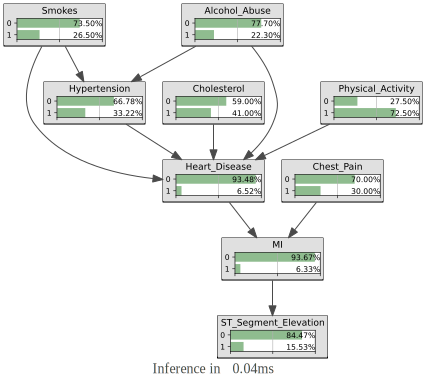

In [3]:
#BAYES_NETWORK
##############
#SCENARIO:
#Risk profile for population without any observed variables (i.e. no evidence) 
#USE CASE NUM:  1    
#EVIDENCE:      none

make_bayes_network_image({})

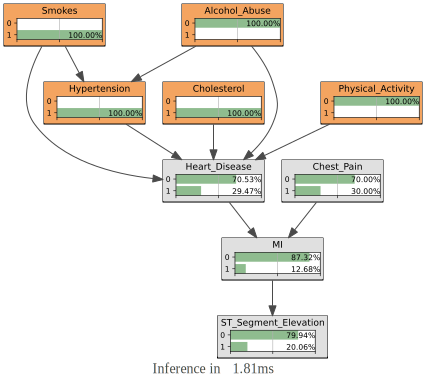

In [19]:
#BAYES_NETWORK
##############
#SCENARIO:
#Heart_disease risk profile for patient with all risk factors turned on
#(i.e. hard evidence observed on all risk factors).

#USE CASE NUM:  2

make_bayes_network_image({'Cholesterol':1, 'Smokes':1,  'Alcohol_Abuse':0, 'Hypertension':1, 'Physical_Activity':0})

#Notes:
# 1) Interestingly, turning on alcohol_abuse with smoking on also, reduces risk of heart_disease by about
# 8%. Most likely because of what the dataset gave us for probabilities. Not in-line with common sense

#2) Highest risk of heart_disease is when All risk factors turned on except a